# Investigating strategy based on the moving average

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
import yfinance as yf

from pathlib import Path

DATA_DIR = Path.cwd().parents[0].joinpath("data")

%load_ext nb_black

<IPython.core.display.Javascript object>

## Reading data

In [52]:
# define the ticker symbol
# We are interested in Google, Microsoft and Apple for now
tickerSymbols = "GOOG MSFT AAPL"

data = yf.download(
    tickerSymbols, start="2018-01-01", end="2020-04-24", group_by="ticker"
)

[*********************100%***********************]  3 of 3 completed


<IPython.core.display.Javascript object>

In [53]:
companies = list(data.columns.levels[0])

<IPython.core.display.Javascript object>

## Creating moving averages

In [54]:
MA30 = pd.DataFrame()
MA100 = pd.DataFrame()
for company in companies:
    MA30[company] = data[company]["Close"].rolling(30).mean()
    MA100[company] = data[company]["Close"].rolling(100).mean()

MA30.reset_index(inplace=True)
MA100.reset_index(inplace=True)

<IPython.core.display.Javascript object>

## Plot stock prices and moving averages

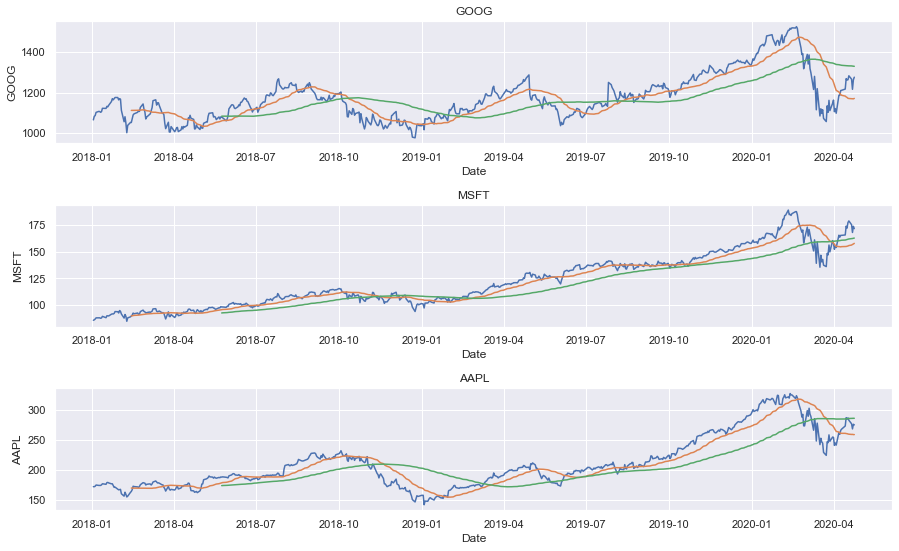

<IPython.core.display.Javascript object>

In [55]:
plt.figure(figsize=(15, 9))

for i, company in enumerate(companies):
    plt.subplot(3, 1, i + 1)
    data_tmp = data[company].copy()
    data_tmp.reset_index(inplace=True)
    ax = sns.lineplot(x="Date", y="Close", data=data_tmp)
    ax = sns.lineplot(x="Date", y=company, data=MA30)
    ax = sns.lineplot(x="Date", y=company, data=MA100)
    ax.set_title(company)

plt.subplots_adjust(hspace=0.5)